In [29]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                resized_img = cv2.resize(img_array, (64, 64))  # Resize to 64x64
                images.append(resized_img)
                labels.append(label)
    return images, labels


In [7]:
# Set dataset paths
train_path = r'C:\\Users\\blneh\\Downloads\\CatvsDog\\train'
test_path = r'C:\\Users\\blneh\\Downloads\\CatvsDog\\test'

categories = ['cat', 'dog']

# Load training data
train_data, train_labels = [], []
for idx, category in enumerate(categories):
    folder_path = os.path.join(train_path, category)
    images, labels = load_images_from_folder(folder_path, idx)
    train_data.extend(images)
    train_labels.extend(labels)

# Load testing data
test_data, test_labels = [], []
for idx, category in enumerate(categories):
    folder_path = os.path.join(test_path, category)
    images, labels = load_images_from_folder(folder_path, idx)
    test_data.extend(images)
    test_labels.extend(labels)

# Convert to numpy arrays and flatten the images
X_train = np.array(train_data).reshape(len(train_data), -1)
y_train = np.array(train_labels)

X_test = np.array(test_data).reshape(len(test_data), -1)
y_test = np.array(test_labels)

print(f"Loaded {len(X_train)} training images and {len(X_test)} testing images.")


Loaded 275 training images and 70 testing images.


Model Accuracy: 48.57%

Classification Report:
               precision    recall  f1-score   support

         cat       0.25      0.25      0.25        24
         dog       0.61      0.61      0.61        46

    accuracy                           0.49        70
   macro avg       0.43      0.43      0.43        70
weighted avg       0.49      0.49      0.49        70


Confusion Matrix:
 [[ 6 18]
 [18 28]]


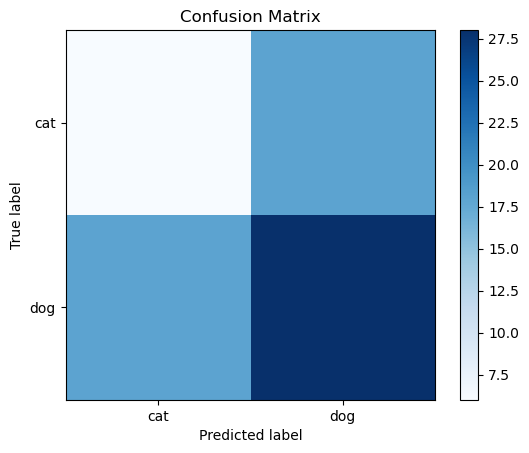

In [9]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test dataset
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=categories))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], categories)
plt.yticks([0, 1], categories)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


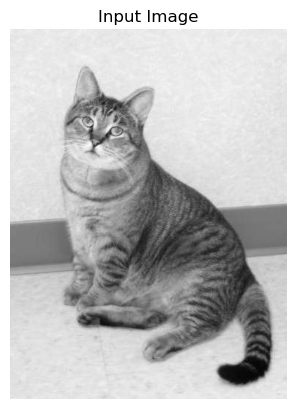

The image is predicted to be a Cat.


In [15]:
import cv2
import matplotlib.pyplot as plt

def predict_new_image(image_path):
    # Read and preprocess the image
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img_array is None:
        print("Error: Image not found or could not be loaded.")
        return
    
    # Show the image using matplotlib
    plt.imshow(img_array, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')  # Hide axes
    plt.show()

    # Resize and flatten the image for the model
    resized_img = cv2.resize(img_array, (64, 64))  # Resize to 64x64
    flattened_img = resized_img.reshape(1, -1)  # Flatten the image

    # Predict using the trained model
    prediction = svm_model.predict(flattened_img)

    # Output the result
    if prediction == 0:
        print("The image is predicted to be a Cat.")
    else:
        print("The image is predicted to be a Dog.")

# Example usage
new_image_path = r'C:\Users\blneh\Downloads\image.jpg'
predict_new_image(new_image_path)


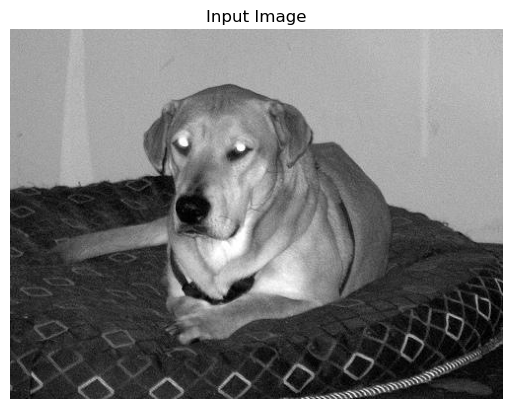

The image is predicted to be a Dog.


In [19]:
# Example usage with the new image path
new_image_path = r'C:\Users\blneh\Downloads\image1.jpg'
predict_new_image(new_image_path)


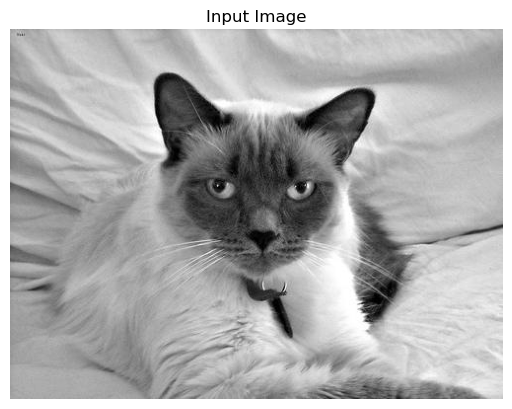

The image is predicted to be a Dog.


In [23]:
# Example usage with the new image path
new_image_path = r'C:\Users\blneh\Downloads\image3.jpg'
predict_new_image(new_image_path)

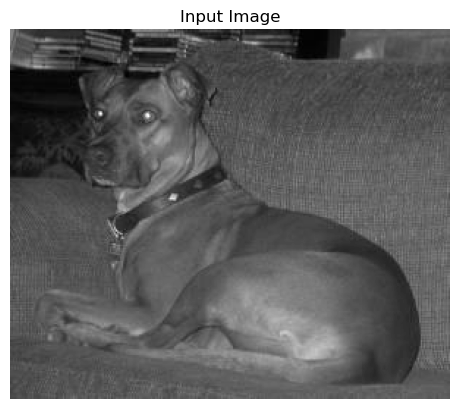

The image is predicted to be a Dog.


In [25]:
# Example usage with the new image path
new_image_path = r'C:\Users\blneh\Downloads\image4.jpg'
predict_new_image(new_image_path)

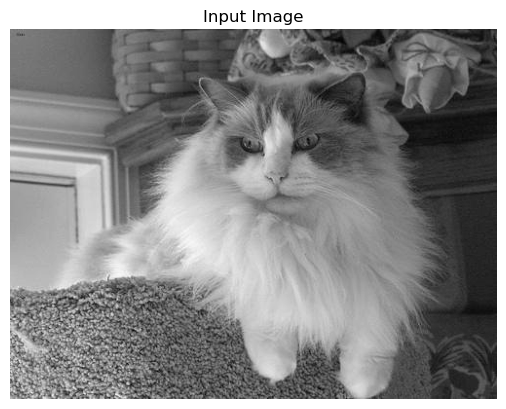

The image is predicted to be a Dog.


In [27]:
# Example usage with the new image path
new_image_path = r'C:\Users\blneh\Downloads\image5.jpg'
predict_new_image(new_image_path)